In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [22]:
df = pd.read_csv("mydataset(cricket).csv")


In [25]:
df.columns


Index(['Player', 'Team', 'Opposition', 'Runs', 'NotOut', 'Mins', 'BF', '4s',
       '6s', 'SR', 'Inns', 'Venue', 'Start Date'],
      dtype='object')

In [30]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [31]:
df.columns


Index(['player', 'team', 'opposition', 'runs', 'notout', 'mins', 'bf', '4s',
       '6s', 'sr', 'inns', 'venue', 'start_date'],
      dtype='object')

In [32]:
df["start_date"] = pd.to_datetime(
    df["start_date"],
    dayfirst=True,
    errors="coerce"
)


In [33]:
numeric_cols = ["runs", "mins", "bf", "4s", "6s", "sr"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [34]:
df[numeric_cols] = df[numeric_cols].fillna(0)
df["venue"] = df["venue"].fillna("Unknown")
df["opposition"] = df["opposition"].fillna("Unknown")


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20922 entries, 0 to 20921
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   player      20922 non-null  object        
 1   team        20922 non-null  object        
 2   opposition  20922 non-null  object        
 3   runs        20922 non-null  float64       
 4   notout      20922 non-null  int64         
 5   mins        20922 non-null  float64       
 6   bf          20922 non-null  float64       
 7   4s          20922 non-null  float64       
 8   6s          20922 non-null  float64       
 9   sr          20922 non-null  float64       
 10  inns        20922 non-null  object        
 11  venue       20922 non-null  object        
 12  start_date  20922 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 2.1+ MB


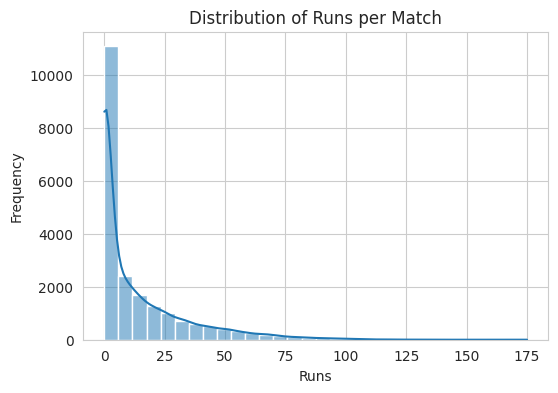

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df["runs"], bins=30, kde=True)
plt.title("Distribution of Runs per Match")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


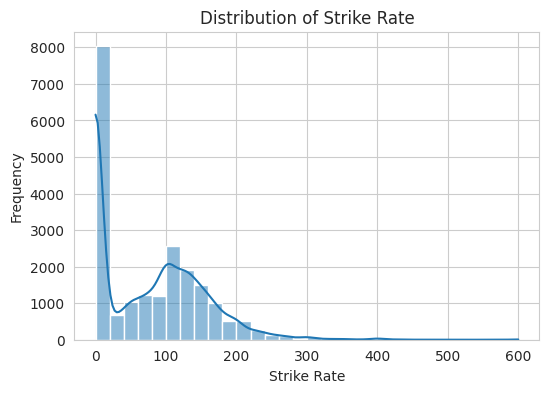

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df["sr"], bins=30, kde=True)
plt.title("Distribution of Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Frequency")
plt.show()


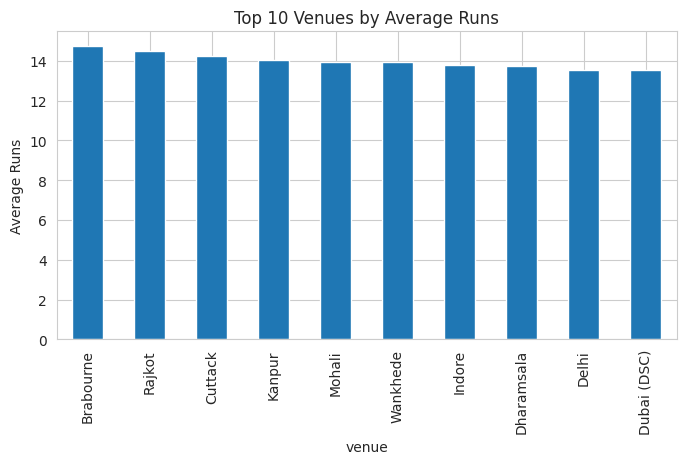

In [38]:
venue_avg = (
    df.groupby("venue")["runs"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
venue_avg.plot(kind="bar")
plt.title("Top 10 Venues by Average Runs")
plt.ylabel("Average Runs")
plt.show()


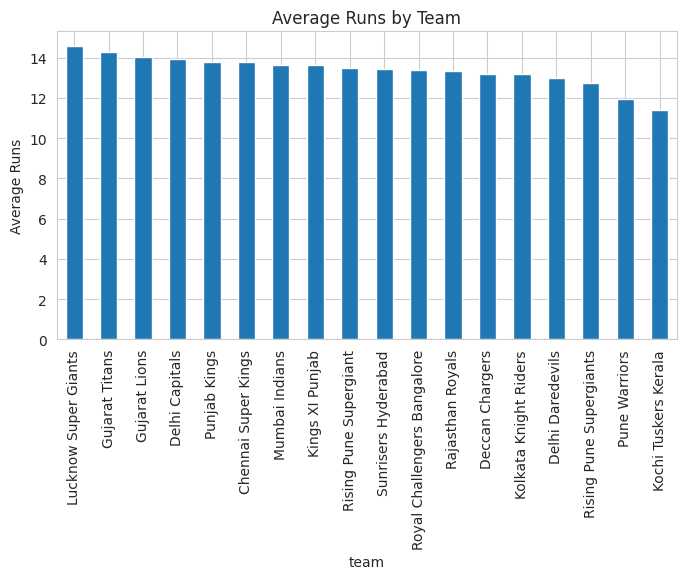

In [39]:
team_avg = (
    df.groupby("team")["runs"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
team_avg.plot(kind="bar")
plt.title("Average Runs by Team")
plt.ylabel("Average Runs")
plt.show()


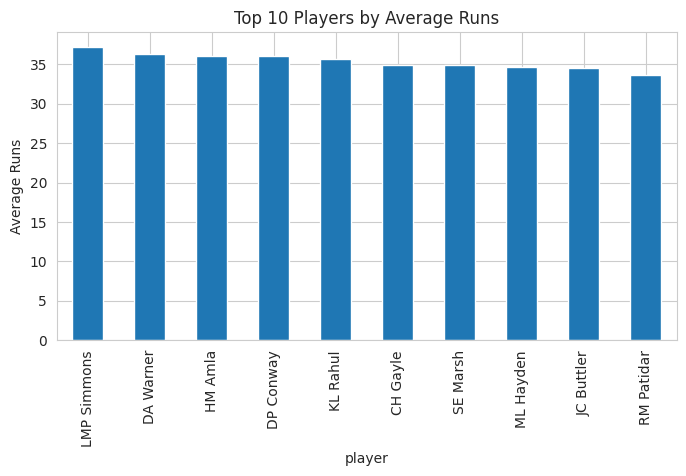

In [40]:
top_players = (
    df.groupby("player")["runs"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_players.plot(kind="bar")
plt.title("Top 10 Players by Average Runs")
plt.ylabel("Average Runs")
plt.show()


In [41]:
df.to_csv("cleaned_cricket_data.csv", index=False)
